In [1]:
from qtn.bimax import BiMax
from qtn.new_bimax import new_BiMax
from qtn.new_bimax_sp import new_BiMax_sp
from qtn.bimax_util import do_cprofile
import numpy as np
from sympy.mpmath import mp,fp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
al_ratio = ant_rad / ant_len
print(al_ratio)

3.8e-06


In [3]:
p1 = BiMax(ant_len, ant_rad, base_cap)
p2 = new_BiMax(ant_len, ant_rad, base_cap)
p3 = new_BiMax_sp(ant_len, ant_rad, base_cap)

In [28]:
@do_cprofile
def pw_1(wc, l, n, t, tc):
    mp.dps = 20
    result = p1.za_l(wc, l, n, t, tc)
    mp.dps = 15
    return result

@do_cprofile
def pw_2(wc, l, n, t, tc):
    return p2.za_l(wc, l, n, t, tc)

@do_cprofile
def pw_3(wc, l, n, t, tc):
    return p3.za_l_sp(wc, l, n, t, tc)

In [29]:
z, wrel, l, n, t , tc= 5, 0.8, 4, 0, 10, 1
wc = wrel * np.sqrt(1 + n)

In [30]:
pw_1(wc, l, n, t, tc)

         1333868 function calls (1330588 primitive calls) in 1.341 seconds

   Ordered by: internal time
   List reduced from 205 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   147714    0.064    0.000    0.088    0.000 {built-in method hasattr}
    18043    0.050    0.000    0.329    0.000 ctx_mp_python.py:982(f)
    51112    0.045    0.000    0.063    0.000 libmpf.py:824(gmpy_mpf_mul)
29308/28393    0.044    0.000    0.133    0.000 <string>:2(__mul__)
    28668    0.038    0.000    0.083    0.000 ctx_mp_python.py:621(convert)
   118465    0.037    0.000    0.037    0.000 {built-in method _mpmath_normalize}
    35982    0.031    0.000    0.038    0.000 ctx_mp_python.py:595(make_mpf)
      915    0.031    0.000    1.304    0.001 bimax.py:90(za_l_integrand)
     1830    0.030    0.000    0.876    0.000 util.py:99(zp)
     4152    0.028    0.000    0.028    0.000 libelefun.py:1086(exp_basecase)
      720    0.026    0.000    0.34

mpc(real='861878.95651100366', imag='31197483.989992094')

In [23]:
pw_2(wc, l, n, t, tc)

         505747 function calls (504405 primitive calls) in 0.473 seconds

   Ordered by: internal time
   List reduced from 213 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    13422    0.021    0.000    0.051    0.000 ctx_mp_python.py:621(convert)
    42570    0.017    0.000    0.021    0.000 {built-in method hasattr}
     1764    0.013    0.000    0.017    0.000 math2.py:503(ei_asymp)
      374    0.012    0.000    0.148    0.000 hypergeometric.py:58(hypercomb)
    14603    0.012    0.000    0.016    0.000 libmpf.py:824(gmpy_mpf_mul)
     7670    0.012    0.000    0.032    0.000 <string>:2(__mul__)
     1126    0.011    0.000    0.033    0.000 ctx_mp.py:646(hypsum)
    13423    0.011    0.000    0.013    0.000 ctx_mp_python.py:595(make_mpf)
1849/1191    0.010    0.000    0.204    0.000 hypergeometric.py:194(hyper)
      407    0.010    0.000    0.348    0.001 bimax_util.py:135(d_l)
    31761    0.009    0.000    0.009    0.000

mpc(real='861878.94874198653', imag='31227472.801959384')

In [24]:
pw_3(wc, l, n, t, tc)

         7272 function calls in 0.041 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      814    0.010    0.000    0.010    0.000 bimax_util.py:94(f1_sp)
      814    0.009    0.000    0.009    0.000 bimax_util.py:59(zp_sp)
      407    0.007    0.000    0.012    0.000 new_bimax_sp.py:192(integrand_za_small_arg_sp)
      407    0.004    0.000    0.015    0.000 bimax_util.py:146(d_l_sp)
      407    0.003    0.000    0.025    0.000 new_bimax_sp.py:183(integrand_za_sp)
      814    0.003    0.000    0.011    0.000 bimax_util.py:75(zpd_sp)
      814    0.001    0.000    0.001    0.000 bimax_util.py:124(j02_sp)
      826    0.001    0.000    0.039    0.000 ctx_base.py:111(<genexpr>)
      826    0.001    0.000    0.038    0.000 quadrature.py:304(<genexpr>)
       12    0.000    0.000    0.039    0.003 {built-in method sum}
      407    0.000    0.000    0.025    0.000 new_bimax_sp.py:216(<lambda>)
      407    0.000    0.000 

(861878.94869821798+31224682.597976848j)

In [33]:
wrel_arr = np.array([0.1, 0.5, 0.6, 0.8, 0.9, 0.95, 1.01, 1.03, \
                         1.05, 1.08, 1.1, 1.2, 1.3, 1.5, \
                         1.7, 2.0, 2.3, 2.6, 3.0, 4, 6])

In [35]:
@do_cprofile
def pw_3(wrel, l, n, t , tc):

    return np.array([p3.new_bimax_sp(wrel, l, n, t, tc) for wrel in wrel_arr])


In [58]:
wrel, l, n, t , tc= 0.8, 4, 0.15, 5, 1
wc = wrel * np.sqrt(1 + n)

In [59]:
v2e_arr = pw_3(wrel, l, n, t , tc)

guess =  10.8707736385
z0 =  10.9947773674 d_l.real =  2.209343819e-14
dl_imag =  1.70416244748e-09
guess =  6.49503561431
z0 =  6.82592377888 d_l.real =  -2.35367281221e-14
dl_imag =  0.0011125414218
direct evaluating integral when peak is small
guess =  3.00023985567
z0 =  5.60688795479 d_l.real =  -4.21884749358e-15
dl_imag =  0.012295056526
direct evaluating integral when peak is small
guess =  2.81180154955
z0 =  4.30323336896 d_l.real =  5.88418203051e-15
dl_imag =  0.0696073769337
direct evaluating integral when peak is small
guess =  2.72372311818
z0 =  3.06014932925 d_l.real =  2.22044604925e-15
dl_imag =  0.156777481596
direct evaluating integral when peak is small
guess =  2.50411368868
z0 =  2.00316797944 d_l.real =  0.0126933026947
dl_imag =  0.414645136046
direct evaluating integral when peak is small
         83270 function calls in 0.418 seconds

   Ordered by: internal time
   List reduced from 123 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  pe

/usr/local/lib/python3.4/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [60]:
v2e_arr

array([  4.43632438e-17,   4.71081666e-17,   4.89538492e-17,
         5.71419661e-17,   6.81640059e-17,   7.95862309e-17,
         1.60813031e-16,   1.94167893e-16,   2.07477562e-16,
         2.10506222e-16,   2.06041115e-16,   1.60899402e-16,
         1.22984467e-16,   7.88719552e-17,   5.42871823e-17,
         3.33840447e-17,   2.19188772e-17,   1.51539330e-17,
         9.86596602e-18,   4.18426992e-18,   1.24805966e-18])

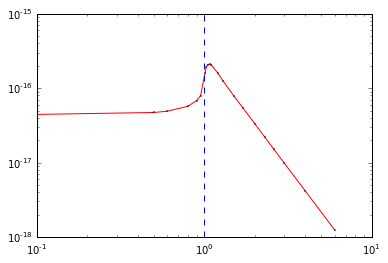

In [62]:

plt.plot(wrel_arr, v2e_arr, '-or', markersize = 1)
plt.axvline(1.0, linestyle = 'dashed')
plt.yscale('log')
plt.xscale('log')
#plt.axhline(v2e_arr[0], linestyle = 'dashed')